データサイエンス特別PG データサイエンス特論 第13回 主成分分析

In [1]:
# google colab で実行する場合は下記のコメントアウトを外して実行する
# ! wget https://raw.githubusercontent.com/KHiraGit/sudspg_ds/main/ic_89_decathlon.csv

# 下記を参考に作成
# https://santakalog.com/2021/02/13/python-pca/

In [2]:
# ライブラリをインポート
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

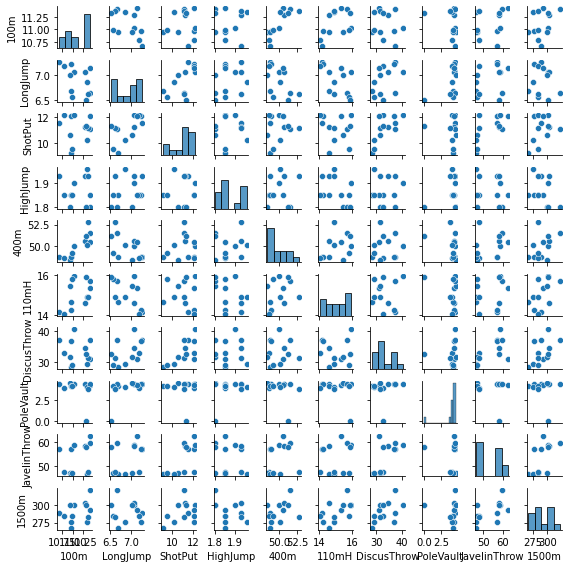

In [3]:
# 十種競技のデータ(csv形式)を読み込んでデータフレームを作成
decathlon_df = pd.read_csv('ic_89_decathlon.csv', encoding='utf-8')
# ペアプロットを表示 (順位の列は除外)
sns.pairplot(decathlon_df.drop(columns='Rank'), height=0.8, aspect=1)

In [4]:
# データを標準化
data = ['100m', 'LongJump', 'ShotPut', 'HighJump', '400m', 
        '110mH', 'DiscusThrow', 'PoleVault', 'JavelinThrow', '1500m']
stdsc = StandardScaler()
decathlon_std_df = stdsc.fit_transform(decathlon_df[data])

C:\Users\KHIRAM~1\AppData\Local\Temp/ipykernel_25664/4010334141.py:13: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(x,y), xytext=origin, # s='' でエラーとなる場合は text='' に変更する


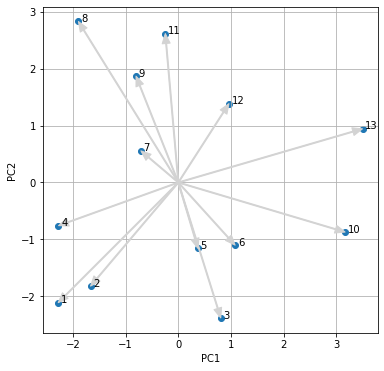

In [5]:
#主成分分析を実行
pca = PCA()
pca.fit(decathlon_std_df)

# データを主成分空間に写像
pca_cor = pca.transform(decathlon_std_df)
pca_df = pd.DataFrame(pca_cor, columns = data)

# 第一主成分と第二主成分で各選手の成績をプロット
plt.figure(figsize=(6, 6))
origin =(0,0)
for x, y, name in zip(pca_cor[:, 0], pca_cor[:, 1], decathlon_df['Rank']):
    plt.annotate(s='', xy=(x,y), xytext=origin, # s='' でエラーとなる場合は text='' に変更する
                 arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                 connectionstyle='arc3', facecolor='lightgray', edgecolor='lightgray'))
    plt.text(x+0.05, y, name)
plt.scatter(pca_cor[:, 0], pca_cor[:, 1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [6]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=data, 
            index=["PC{}".format(x + 1) for x in range(len(data))])

,100m,LongJump,ShotPut,HighJump,400m,110mH,DiscusThrow,PoleVault,JavelinThrow,1500m
PC1,0.427310,-0.315988,0.073290,-0.184503,0.431617,0.416903,0.085629,-0.288103,0.273132,0.391288
PC2,0.102505,-0.436170,-0.505135,-0.046516,0.038017,0.114969,-0.506395,-0.147094,-0.430292,-0.253052
PC3,0.383994,0.035816,0.071340,0.708596,0.464614,-0.260849,-0.058383,0.132795,0.005753,-0.197698
PC4,-0.058852,0.028219,0.343438,-0.105154,0.034453,-0.325713,-0.128179,-0.786234,0.100444,-0.338784
PC5,0.486843,0.316551,0.116094,-0.446033,-0.048310,-0.207606,-0.530039,0.294385,0.190229,-0.033644
PC6,-0.099600,-0.195487,0.163846,-0.297235,0.362937,-0.546423,0.120864,0.113713,-0.495528,0.365079
PC7,-0.039873,-0.226980,-0.575807,-0.043176,-0.030984,-0.514957,0.127076,-0.024902,0.568200,0.087816
PC8,-0.014124,-0.311307,0.140055,-0.342866,0.237070,0.078435,0.337141,0.329512,0.119187,-0.683311
PC9,0.628756,0.080973,-0.154088,-0.056818,-0.395361,-0.109533,0.518859,-0.165563,-0.315517,-0.081573
PC10,-0.109201,0.643754,-0.448544,-0.201709,0.497673,0.117618,0.147707,-0.152838,-0.108549,-0.115346


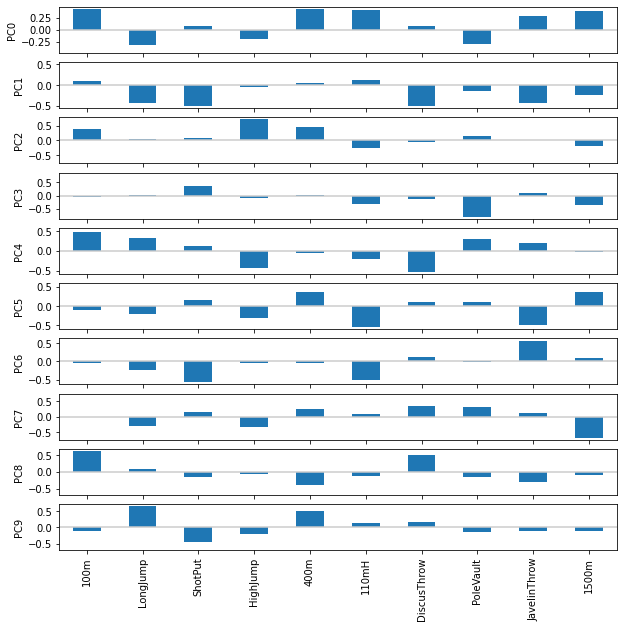

In [7]:
# 固有ベクトルを棒グラフで表示
centers = pd.DataFrame(pca.components_, columns=data)
f, axes = plt.subplots(len(data), 1, sharex=True, figsize=(10,10))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'PC{i}')
    ax.set_ylim(-maxPC, maxPC)

C:\Users\KHIRAM~1\AppData\Local\Temp/ipykernel_25664/4099270733.py:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(x,y), xytext=origin, # s='' でエラーとなる場合は text='' に変更する


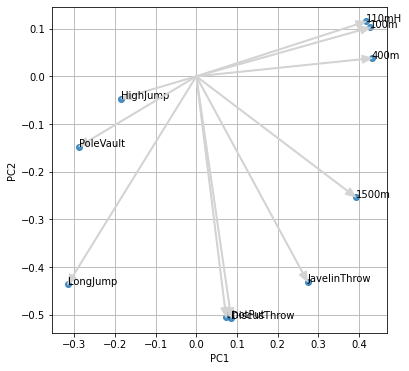

In [8]:
# 第一主成分と第二主成分における観測変数をプロット
plt.figure(figsize=(6, 6))
origin =(0,0)
for x, y, name in zip(pca.components_[0], pca.components_[1], data):
    plt.annotate(s='', xy=(x,y), xytext=origin, # s='' でエラーとなる場合は text='' に変更する
                 arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                 connectionstyle='arc3', facecolor='lightgray', edgecolor='lightgray'))
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [9]:
# 寄与率
_output = ''
for i in range(10):
    _output = _output + f'[PC{i+1} {pca.explained_variance_ratio_[i]:.03f}] '
print(_output)

[PC1 0.332] [PC2 0.298] [PC3 0.143] [PC4 0.091] [PC5 0.050] [PC6 0.033] [PC7 0.025] [PC8 0.020] [PC9 0.007] [PC10 0.001] 


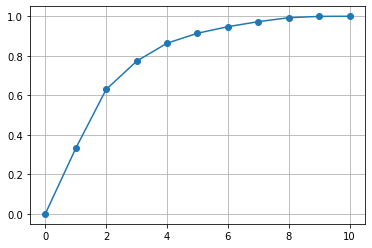

In [10]:
# 累積寄与率
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.grid()
plt.show()